# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [4]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных.

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2.


In [7]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


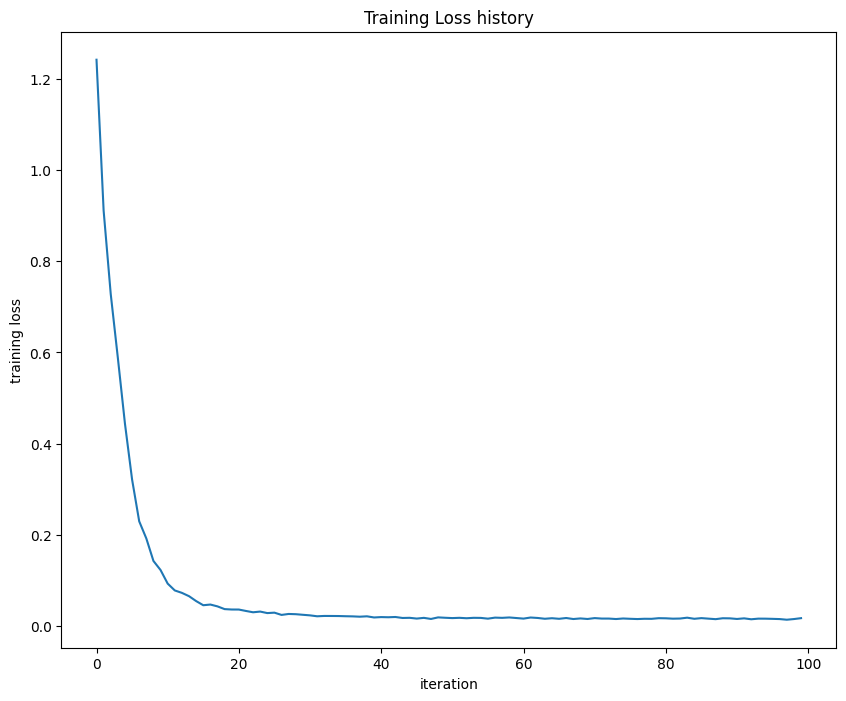

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту.

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1.

Обучите нейронную сеть на ваших данных.

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [9]:
!bash scripts/datasets/get_datasets.sh

--2025-11-23 12:54:46--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.5MB/s    in 6.2s    

2025-11-23 12:54:53 (26.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [10]:
from scripts.data_utils import load_CIFAR10
from sklearn.model_selection import train_test_split

In [11]:
def get_dataset():
  cifar10_dir = 'scripts/datasets/cifar-10-batches-py'
  try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
  except:
    pass
    return load_CIFAR10(cifar10_dir);

In [12]:
def get_small_set(X, y, num_set=1000):
  # выбираем num_set экземпляров для выборки
  X_small = X[0:num_set]
  y_small = y[0:num_set]
  # преобразуем данные в одномерные массивы
  X_small = X_small.reshape(X_small.shape[0], -1)
  return X_small, y_small

In [16]:
X_train, y_train, X_test, y_test = get_dataset()

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, y_train = get_small_set(X_train, y_train, num_set=5000)
X_test, y_test = get_small_set(X_test, y_test, num_set=500)
X_val, y_val = get_small_set(X_val, y_val, num_set=500)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)

Training data shape:  (5000, 3072)
Training labels shape:  (5000,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)
Validate data shape:  (500, 3072)
Validate labels shape:  (500,)


In [15]:
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print("Размеры обучающей выборки с учетом смещения:", X_train.shape)
print("Размеры тестовой выборки с учетом смещения:", X_test.shape)
print("Размеры валидационной выборки с учетом смещения:", X_val.shape)

Размеры обучающей выборки с учетом смещения: (5000, 3072)
Размеры тестовой выборки с учетом смещения: (500, 3072)
Размеры валидационной выборки с учетом смещения: (500, 3072)


In [19]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302971
iteration 100 / 1000: loss 2.300050
iteration 200 / 1000: loss 2.259747
iteration 300 / 1000: loss 2.164829
iteration 400 / 1000: loss 2.090739
iteration 500 / 1000: loss 2.045569
iteration 600 / 1000: loss 2.055065
iteration 700 / 1000: loss 2.020479
iteration 800 / 1000: loss 2.152533
iteration 900 / 1000: loss 2.068220
Validation accuracy:  0.202


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29.

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др.

Для лучшей модели вычислите acсuracy на тестовом наборе.

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков.

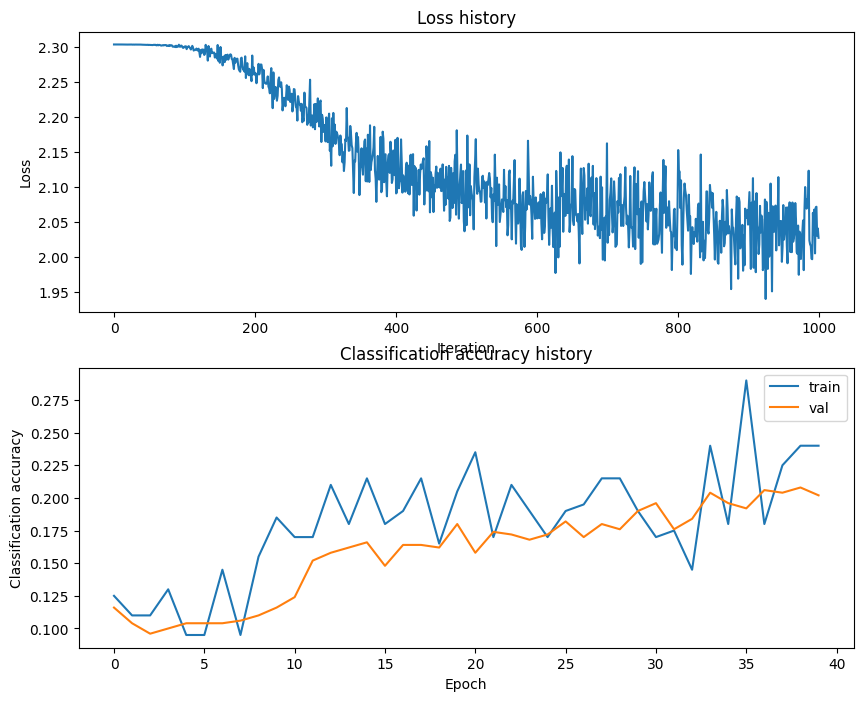

In [20]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

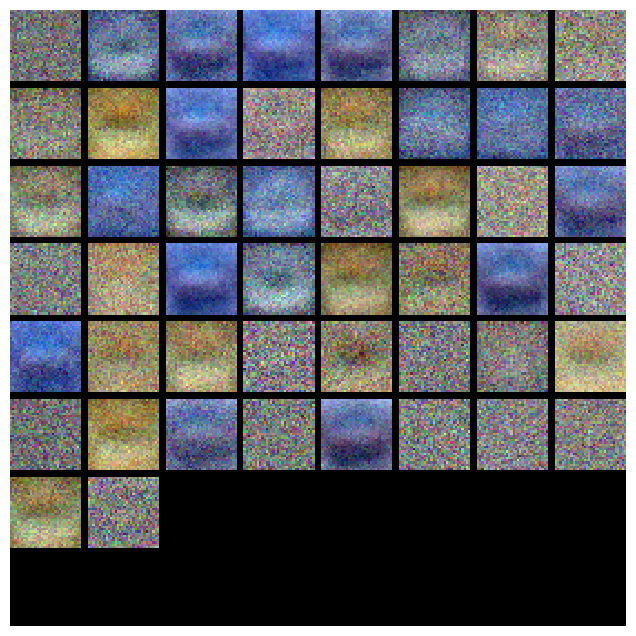

In [21]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [26]:
hidden_size = [75, 100, 125]
learning_rates = np.array([0.1e-3, 0.7e-3, 1.3e-3])
regularization_strengths = [0.75, 1.25]
num_iters = [1000, 1500]

In [27]:
results = {}

for lr in learning_rates:
    for reg in regularization_strengths:
      for hs in hidden_size:
        for iter in num_iters:
          net = TwoLayerNet(input_size, hs, num_classes)
          stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=iter, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)
          val_acc = (net.predict(X_val) == y_val).mean()
          results[(lr, reg, hs, iter)] = (val_acc)

iteration 0 / 1000: loss 2.304372
iteration 100 / 1000: loss 2.303284
iteration 200 / 1000: loss 2.280138
iteration 300 / 1000: loss 2.208844
iteration 400 / 1000: loss 2.159599
iteration 500 / 1000: loss 2.026909
iteration 600 / 1000: loss 2.073508
iteration 700 / 1000: loss 2.022823
iteration 800 / 1000: loss 2.084555
iteration 900 / 1000: loss 2.065076
iteration 0 / 1500: loss 2.304384
iteration 100 / 1500: loss 2.300050
iteration 200 / 1500: loss 2.272561
iteration 300 / 1500: loss 2.191208
iteration 400 / 1500: loss 2.096737
iteration 500 / 1500: loss 2.116494
iteration 600 / 1500: loss 2.030096
iteration 700 / 1500: loss 2.109035
iteration 800 / 1500: loss 1.988152
iteration 900 / 1500: loss 2.106884
iteration 1000 / 1500: loss 2.000842
iteration 1100 / 1500: loss 1.980769
iteration 1200 / 1500: loss 2.013374
iteration 1300 / 1500: loss 2.068225
iteration 1400 / 1500: loss 2.061226
iteration 0 / 1000: loss 2.304930
iteration 100 / 1000: loss 2.296541
iteration 200 / 1000: loss 2.

In [29]:
best_params = max(results, key=results.get)
print(f"Лучшие параметры: lr={best_params[0]:.4f}, reg={best_params[1]}, hidden_size={best_params[2]}, iters={best_params[3]}")


Лучшие параметры: lr=0.0007, reg=0.75, hidden_size=75, iters=1000


In [32]:
net = TwoLayerNet(input_size, 75, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=0.0007, learning_rate_decay=0.95,
            reg=0.75, verbose=True)
test_acc = (net.predict(X_test) == y_test).mean()
print(f"Точность на тестовой выборке = {test_acc:.4f}")


iteration 0 / 1000: loss 2.304398
iteration 100 / 1000: loss 2.244485
iteration 200 / 1000: loss 1.916537
iteration 300 / 1000: loss 1.801857
iteration 400 / 1000: loss 1.926239
iteration 500 / 1000: loss 1.676713
iteration 600 / 1000: loss 1.658407
iteration 700 / 1000: loss 1.705249
iteration 800 / 1000: loss 1.668769
iteration 900 / 1000: loss 1.608711
Точность на тестовой выборке = 0.3640


Сделайте выводы по результатам работы.

Точность модели зависит от подобранных гиперпараметров.
После подбора гиперпараметров получилось увеличить accuracy модели до 0.3640, что в 1.5 раза лучше, чем было изначально.